# Релизуйте свой классификатор KNN

### Импорты

In [100]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [101]:
class MyKNeighborsClassifier:
    
    def __init__(self, n_neighbours: int = 5, weights: str = "uniform", metric: str = "euclidean"):
        if metric not in ["manhattan", "euclidean"]:
            raise ValueError("This type of metric is not supported: {}".format(metric))
        if weights not in ["uniform", "distance"]:
            raise ValueError("This type of weights is not supported: {}".format(weights))
            
        #Запоминаем метрики и веса, с которыми будем работать    
        
        if metric == "euclidean":
            self.eucl = True
        else:
            self.eucl = False
            
        if weights == "uniform":
            self.uni = True
        else:
            self.uni = False
        
            
        #сеттим поля
        
        self.n_neighbours = n_neighbours
        self.weights = weights
        self.metric = metric

        self.X = None
        self.y = None
        
    #Евклидово расстояние
    
    def euclid(self, x, y):
        dist = 0.0
        for index, xi in enumerate(x):
            dist+=(xi-y[index])**2
        return np.sqrt(dist)
    
    #Расстояние по Омерикански
    
    def manhatan(self, x, y):
        dist = 0.0
        for index, xi in enumerate(x):
            dist+=abs(xi-y[index])
        return (dist)
        
    #фиттим (в самой функции передаем значения в X и y)
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X = X
        self.y = y
        
    #вспомогательный метод для определения "весомости" точки и подсчета класса 
    
    def weights_count(self, dists):
        c0 = 0 #кол-во 0 класса
        c1 = 0 #кол-во 1 класса
        
        for i in dists: #dists = [(dist, label:0,1)]
            if i[1] == 0: #если точка отностится к 0 классу
                c0 += (1/i[0]) # считаем ее весомость по формуле 1/dist
            elif i[1] == 1: # аналогично
                c1 += (1/i[0])
        return 0 if c0 > c1 else 1 # чего больше тот класс и возвращаем 


    
    #Предиктим!!!
    
    def predict(self, X: np.ndarray) -> np.ndarray:   
        y_test = []
        for xi in X: #для каждого вектора из X
            neighbours = []
            for index, xi_train in enumerate(self.X): #считаем расстояние до каждой точки из обучающей выборки
                
                if self.eucl: #По евклидовски, если таков был выбран
                #Передаем кортеж вида: Расстояние и класс, к которму относится точка
                    neighbours.append((self.euclid(xi, xi_train),self.y[index])) 
                else: #По омерикански, если выбрали манхетен
                    #Передаем кортеж вида: Расстояние и класс, к которму относится точка
                    neighbours.append((self.manhatan(xi, xi_train),self.y[index]))
                
                    
            #Сортируем по первому элементу кортежа (расстоянию)     
            neighbours.sort(key = lambda x : x[0])
             
            #Создаем времменый массив для подсчета классов
            tmp = []
            for i in range(self.n_neighbours):
                #Из отсортированного массива кладем в tmp только классы k штук (кол-во соседей)
                tmp.append(neighbours[i][1])
            #Если выбрали uniform просто считаем по tmp кого-больше
            if self.uni:
                y_test.append(np.argmax(np.bincount(tmp)))
            else:
            #Если distance, то вызываем вспомогательный метод weights_count, который вернет 0 или 1
                y_test.append(self.weights_count(neighbours[:self.n_neighbours]))
      
        return np.array(y_test)
        
        
        
        

### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



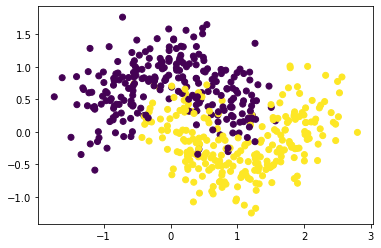

In [104]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
clasir = KNeighborsClassifier()
clasir.fit(X_train, y_train)
y_pred_KNN = clasir.predict(X_test)
 
clasir = MyKNeighborsClassifier()
clasir.fit(X_train, y_train)
y_pred_MyKNN = clasir.predict(X_test)
 


In [107]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred_MyKNN))
print(accuracy_score(y_test, y_pred_KNN))
print("Параметры по умолчанию")

0.89
0.89
Параметры по умолчанию


In [108]:
 
from sklearn.neighbors import KNeighborsClassifier
clasir = KNeighborsClassifier(weights='distance')
clasir.fit(X_train, y_train)
y_pred_KNN = clasir.predict(X_test)
 
clasir = MyKNeighborsClassifier(weights='distance')
clasir.fit(X_train, y_train)
y_pred_MyKNN = clasir.predict(X_test)
 

In [109]:
 from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred_MyKNN))
print(accuracy_score(y_test, y_pred_KNN))
print("weights='distance'")

0.87
0.87
weights='distance'


In [110]:
 from sklearn.neighbors import KNeighborsClassifier
clasir = KNeighborsClassifier(metric='manhattan')
clasir.fit(X_train, y_train)
y_pred_KNN = clasir.predict(X_test)
 
clasir = MyKNeighborsClassifier(metric='manhattan')
clasir.fit(X_train, y_train)
y_pred_MyKNN = clasir.predict(X_test)
 


In [111]:
print(accuracy_score(y_test, y_pred_MyKNN))
print(accuracy_score(y_test, y_pred_KNN))
print("metric='manhattan'")

0.92
0.92
metric='manhattan'


In [112]:
 from sklearn.neighbors import KNeighborsClassifier
clasir = KNeighborsClassifier(weights='distance', metric='manhattan')
clasir.fit(X_train, y_train)
y_pred_KNN = clasir.predict(X_test)
 
clasir = MyKNeighborsClassifier(weights='distance', metric='manhattan')
clasir.fit(X_train, y_train)
y_pred_MyKNN = clasir.predict(X_test)
 

In [113]:
print(accuracy_score(y_test, y_pred_MyKNN))
print(accuracy_score(y_test, y_pred_KNN))
print("weights='distance', metric='manhattan'")

0.88
0.88
weights='distance', metric='manhattan'


In [114]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [115]:
from sklearn.neighbors import KNeighborsClassifier
score_KNN = []
score_MyKNN = []

for i in k:
    clasir = KNeighborsClassifier(n_neighbors=i)
    clasir.fit(X_train, y_train)
    y_pred_KNN = clasir.predict(X_test)
    score_KNN.append(accuracy_score(y_test, y_pred_KNN))
     
   
        
for i in k:
    clasir = MyKNeighborsClassifier(n_neighbours = i)
    clasir.fit(X_train, y_train)
    y_pred_MyKNN = clasir.predict(X_test)
    score_MyKNN.append(accuracy_score(y_test, y_pred_MyKNN))
 

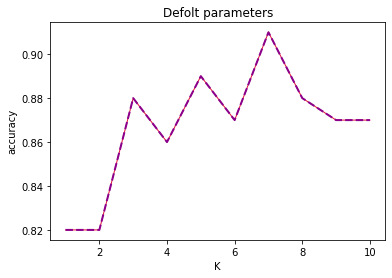

In [116]:
fig, ax = plt.subplots()
ax.plot(k, score_MyKNN,
        linestyle = '-',
        linewidth = 1,
        color = 'crimson')
ax.plot(k, score_KNN,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.title("Defolt parameters")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()


In [117]:
score_KNN = []
score_MyKNN = []

for i in k:
    clasir = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clasir.fit(X_train, y_train)
    y_pred_KNN = clasir.predict(X_test)
    score_KNN.append(accuracy_score(y_test, y_pred_KNN))
     
   
        
for i in k:
    clasir = MyKNeighborsClassifier(n_neighbours = i, weights='distance')
    clasir.fit(X_train, y_train)
    y_pred_MyKNN = clasir.predict(X_test)
    score_MyKNN.append(accuracy_score(y_test, y_pred_MyKNN))


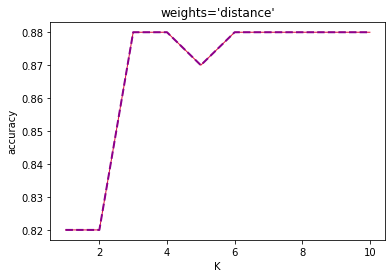

In [118]:
fig, ax = plt.subplots()
ax.plot(k, score_MyKNN,
        linestyle = '-',
        linewidth = 1,
        color = 'crimson')
ax.plot(k, score_KNN,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.title("weights='distance'")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

In [119]:
score_KNN = []
score_MyKNN = []

for i in k:
    clasir = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    clasir.fit(X_train, y_train)
    y_pred_KNN = clasir.predict(X_test)
    score_KNN.append(accuracy_score(y_test, y_pred_KNN))
     
   
        
for i in k:
    clasir = MyKNeighborsClassifier(n_neighbours = i, metric='manhattan')
    clasir.fit(X_train, y_train)
    y_pred_MyKNN = clasir.predict(X_test)
    score_MyKNN.append(accuracy_score(y_test, y_pred_MyKNN))


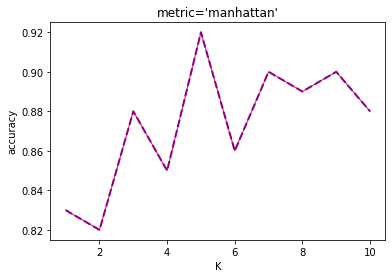

In [120]:
fig, ax = plt.subplots()
ax.plot(k, score_MyKNN,
        linestyle = '-',
        linewidth = 1,
        color = 'crimson')
ax.plot(k, score_KNN,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.title("metric='manhattan'")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

In [121]:
score_KNN = []
score_MyKNN = []

for i in k:
    clasir = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
    clasir.fit(X_train, y_train)
    y_pred_KNN = clasir.predict(X_test)
    score_KNN.append(accuracy_score(y_test, y_pred_KNN))
     
   
        
for i in k:
    clasir = MyKNeighborsClassifier(n_neighbours = i, weights='distance', metric='manhattan')
    clasir.fit(X_train, y_train)
    y_pred_MyKNN = clasir.predict(X_test)
    score_MyKNN.append(accuracy_score(y_test, y_pred_MyKNN))

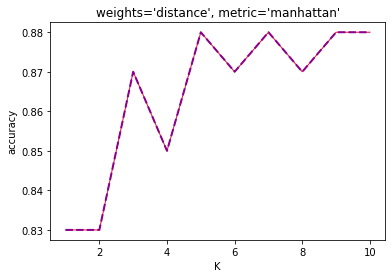

In [122]:
fig, ax = plt.subplots()
ax.plot(k, score_MyKNN,
        linestyle = '-',
        linewidth = 1,
        color = 'crimson')
ax.plot(k, score_KNN,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.title("weights='distance', metric='manhattan'")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

### Итоги и выводы

1) Модель работает также как и в sklearn, что видно на графиках и в accuracy  

2) При изменении параметра n_neighbours, при weights = uniform, accuracy растет, но после n_neighbours = 5-7 снижается, а при weights = distance, accuracy возрастает, причем с metrics = euclidian accuracy стабильнее

3) Модель с параметрами metrics = manhattan, n_neighbours = 5, weights = uniform, оаботает лучше с показателем accuracy = 0.92